In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv("customer_segmentation.csv")

In [3]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
customers_modify = customers.copy()

In [5]:
customers_modify.shape

(10127, 14)

In [6]:
customers_modify.gender.map({"F":0, "M":1})

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: gender, Length: 10127, dtype: int64

In [7]:
customers_modify["gender"] =customers_modify.gender.map({"F":0, "M":1})
customers_modify.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [8]:
customers_modify.education_level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Post-Graduate',
       'College', 'Doctorate'], dtype=object)

In [9]:
el = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5}

In [10]:
customers_modify.replace(el, inplace=True)

C:\Users\CGDC\AppData\Local\Temp\ipykernel_21460\3528039970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modify.replace(el, inplace=True)


In [11]:
customers_modify.education_level.unique()

array([1, 3, 0, 4, 2, 5], dtype=int64)

In [12]:
customers_modify = pd.get_dummies(customers_modify, drop_first=True)

In [13]:
customers_modify.shape

(10127, 16)

In [14]:
X = customers_modify.drop('customer_id', axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled.shape

(10127, 15)

In [19]:
from sklearn.cluster import KMeans

In [20]:
X = pd.DataFrame(X_scaled)
inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_predict (X)
    inertia = model.inertia_
    inertias.append(inertia)

In [21]:
inertias

[151905.00000000003,
 134790.6938934637,
 123779.88760117974,
 115505.77508964184,
 107854.34683377207,
 98724.6596029376,
 94724.0000867931,
 91943.38727053574,
 88873.26915719185,
 87036.46405453129]

In [22]:
import matplotlib.pyplot as plt

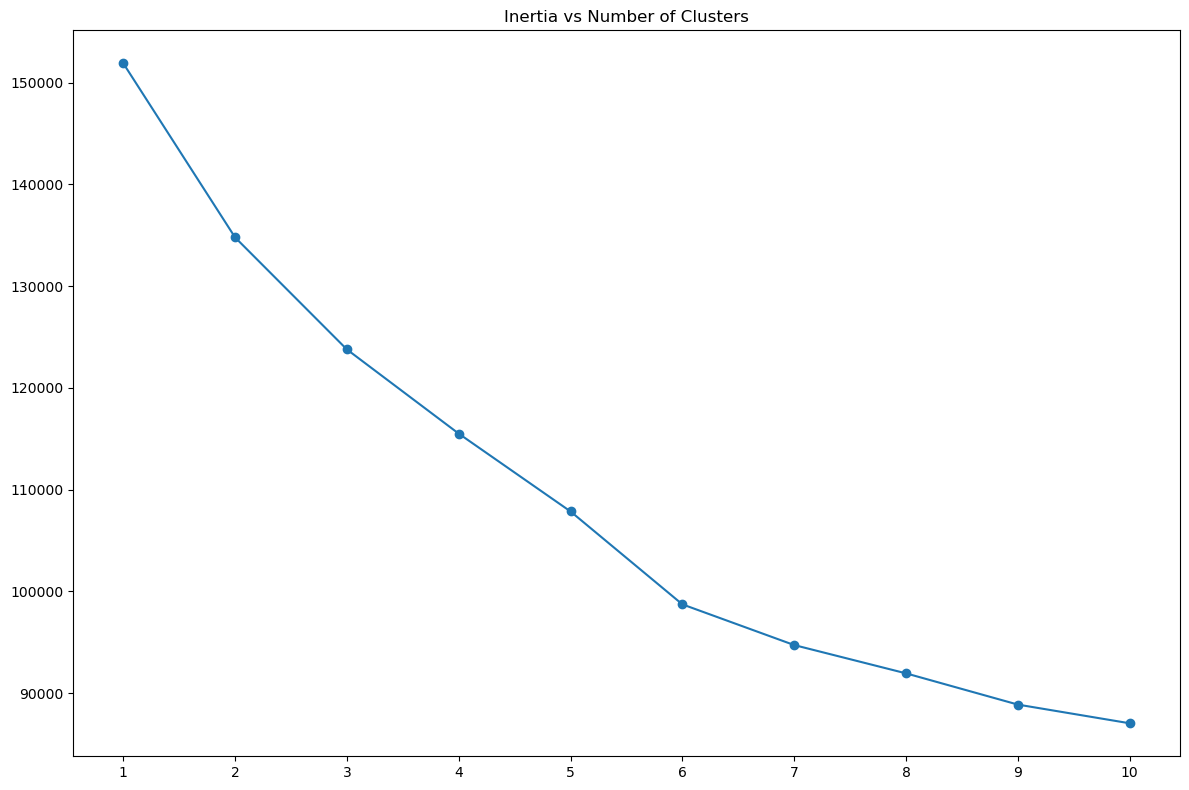

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

In [24]:
model = KMeans(n_clusters=6)

y = model.fit_predict(X_scaled)

In [25]:
customers["CLUSTER"] = y+1

In [26]:
customers["CLUSTER"].value_counts()

CLUSTER
5    2804
6    2490
4    1767
2    1424
1     912
3     730
Name: count, dtype: int64

In [36]:
numeric_columns = customers.select_dtypes("number").drop(["customer_id","CLUSTER"],axis = 1).columns
len(numeric_columns)

10

In [42]:
import seaborn as sns

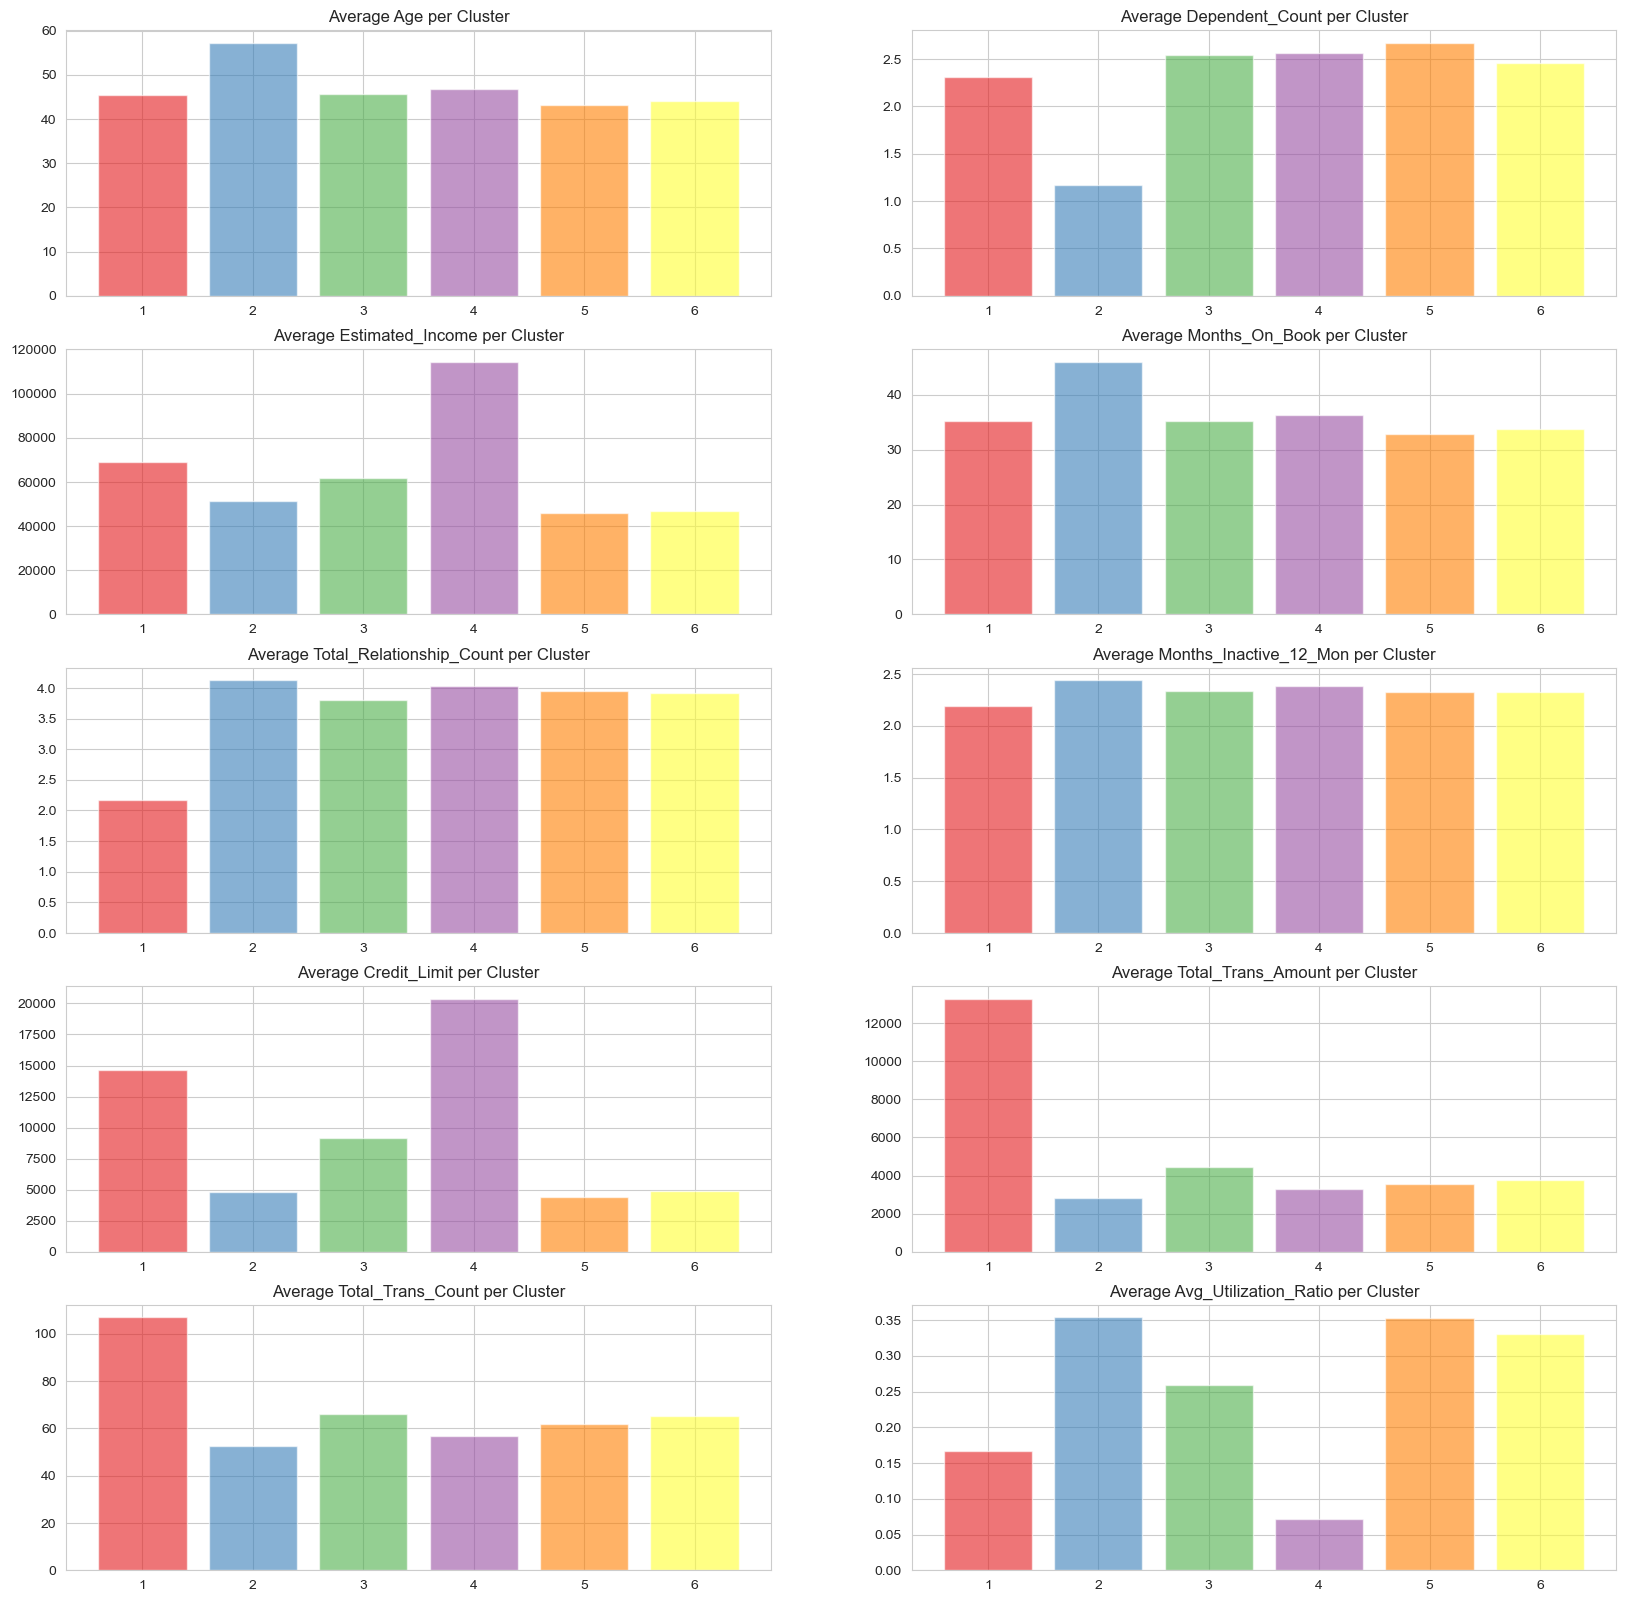

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize=(20,20))
for i ,c in enumerate(numeric_columns):
    group_means = customers.groupby("CLUSTER")[c].mean()
    ax = plt.subplot(5,2,i+1)
    ax.bar(group_means.index, group_means,color = sns.color_palette("Set1"), alpha = 0.6)
    ax.set_title(f"Average {c.title()} per Cluster")

plt.show()

In [69]:
cat_columns = customers.select_dtypes(include=['object']).columns

In [70]:
cat_columns

Index(['gender', 'education_level', 'marital_status'], dtype='object')

In [59]:
customers.groupby("CLUSTER")["gender"].value_counts(normalize=True)

CLUSTER  gender
1        M         0.651316
         F         0.348684
2        F         0.603230
         M         0.396770
3        F         0.516438
         M         0.483562
4        M         0.964912
         F         0.035088
5        F         0.705777
         M         0.294223
6        F         0.708032
         M         0.291968
Name: proportion, dtype: float64

In [63]:
pd.crosstab(index = customers["CLUSTER"], columns=customers["gender"], values=customers["gender"], aggfunc="size", normalize="index")

gender,F,M
CLUSTER,,
1,0.348684,0.651316
2,0.603230,0.396770
3,0.516438,0.483562
4,0.035088,0.964912
5,0.705777,0.294223
6,0.708032,0.291968


C:\Users\CGDC\AppData\Local\Temp\ipykernel_21460\207850011.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
C:\Users\CGDC\AppData\Local\Temp\ipykernel_21460\207850011.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
C:\Users\CGDC\AppData\Local\Temp\ipykernel_21460\207850011.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])


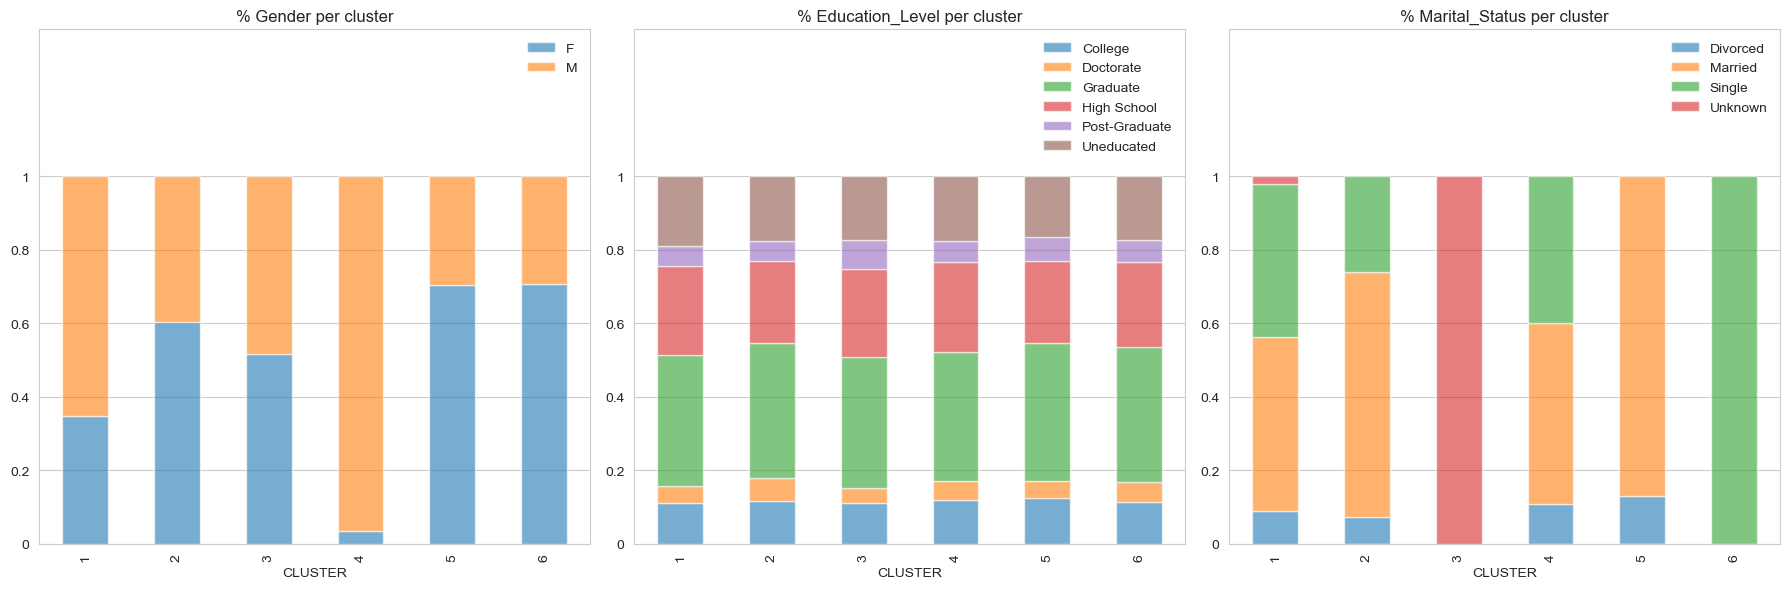

In [85]:
plt.figure(figsize=(18,6))

for i, c in enumerate(cat_columns):
    df = pd.crosstab(index =customers["CLUSTER"], columns=customers[c],values=customers[c], aggfunc="size", normalize="index")
    ax = plt.subplot(1,3,i+1)
    df.plot.bar(stacked = True, ax = ax, alpha = 0.6)
    ax.set_title(f"% {c.title()} per cluster")
    ax.set_ylim(0,1.4)
    ax.legend(frameon = False)
    ax.xaxis.grid(False)
    ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

plt.tight_layout()
plt.show()
